## 방법 1. Kaggle API 연동
- Kaggle API 연동 코드

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"j2hoon85","key":"46d37c31ecd2c69ef9c8c5c74f29d17e"}'}

In [ ]:
!ls -1ha kaggle.json
!mkdir -p ~/.kaggle # 파일 생성
!mv kaggle.json ~/.kaggle/ # kaggle.json 파일 이동
!chmod 600 ~/.kaggle/kaggle.json # 권한 부여

kaggle.json


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         88           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        183           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        314           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2337           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      17933            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4867            True  
connectx

## 데이터 다운로드

In [ ]:
!kaggle competitions download -c kaggle-survey-2020

  0% 0.00/46.5k [00:00<?, ?B/s]
100% 46.5k/46.5k [00:00<00:00, 17.6MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 90.9MB/s]
  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 62.8MB/s]


In [ ]:
!unzip kaggle_survey_2020_responses.csv.zip
!ls

Archive:  kaggle_survey_2020_responses.csv.zip
  inflating: kaggle_survey_2020_responses.csv  
kaggle_survey_2020_answer_choices.pdf  kaggle_survey_2020_responses.csv.zip
kaggle_survey_2020_methodology.pdf     sample_data
kaggle_survey_2020_responses.csv


## 방법 2. 구글 드라이브 연동


In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [2]:
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/competition/kaggle/2020 Kaggle Machine Learning'

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/competition/kaggle/2020 Kaggle Machine Learning


In [3]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/competition/kaggle/2020 Kaggle Machine Learning


In [4]:
%ls data/*

'data/2020 Continents.csv'
 data/kaggle_survey_2020_methodology.pdf
 data/kaggle_survey_2020_responses.csv
 data/kaggle_survey_2020_responses.csv.zip


## EDA


### 라이브러리 불러오기

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go 

pd.set_option('mode.chained_assignment', None)
survey_df = pd.read_csv('data/kaggle_survey_2020_responses.csv', skiprows=1)
survey_df.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,"Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)",Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - RStudio,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio / Visual Studio Code,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Click to write Choice 13,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - PyCharm,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Spyder,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Notepad++,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Sublime Text,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Vim / Emacs,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Other,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Kaggle Notebooks,Which of the following hosted notebook products do you u

## 데이터 전처리 1차 - 나라명 바꾸기
- 나라명을 바꿔보도록 하자. 

In [6]:
survey_df[survey_df.columns[3]].replace({'United Kingdom of Great Britain and Northern Ireland':'UK', 
                                'Iran, Islamic Republic of...':'Iran', 
                                'United Arab Emirates':'UAE',
                                'United States of America':'USA',
                                'Viet Nam':'Vietnam'}, inplace=True)

print(f"List of countries:\n{np.sort(survey_df[survey_df.columns[3]].unique())}\n")

List of countries:
['Argentina' 'Australia' 'Bangladesh' 'Belarus' 'Belgium' 'Brazil'
 'Canada' 'Chile' 'China' 'Colombia' 'Egypt' 'France' 'Germany' 'Ghana'
 'Greece' 'India' 'Indonesia' 'Iran' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Kenya' 'Malaysia' 'Mexico' 'Morocco' 'Nepal' 'Netherlands' 'Nigeria'
 'Other' 'Pakistan' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Republic of Korea' 'Romania' 'Russia' 'Saudi Arabia' 'Singapore'
 'South Africa' 'South Korea' 'Spain' 'Sri Lanka' 'Sweden' 'Switzerland'
 'Taiwan' 'Thailand' 'Tunisia' 'Turkey' 'UAE' 'UK' 'USA' 'Ukraine'
 'Vietnam']



### India, USA, Others
- 미국과 인도를 제외한 다른 나라들은 삭제를 한다. 

In [7]:
survey_df[survey_df.columns[3]].unique()

array(['Colombia', 'USA', 'Argentina', 'Japan', 'India', 'Brazil',
       'China', 'Germany', 'Indonesia', 'Canada', 'Switzerland', 'Other',
       'Singapore', 'Russia', 'South Africa', 'Egypt', 'Netherlands',
       'Pakistan', 'Nepal', 'South Korea', 'Poland', 'Belarus', 'Tunisia',
       'Ukraine', 'Belgium', 'Saudi Arabia', 'Taiwan', 'Nigeria', 'Italy',
       'Spain', 'UAE', 'Mexico', 'Vietnam', 'Thailand', 'UK', 'France',
       'Ghana', 'Ireland', 'Philippines', 'Morocco', 'Turkey', 'Iran',
       'Peru', 'Romania', 'Republic of Korea', 'Australia', 'Chile',
       'Kenya', 'Sweden', 'Bangladesh', 'Greece', 'Malaysia', 'Portugal',
       'Israel', 'Sri Lanka'], dtype=object)

In [8]:
def assignCountry(country):
    if country == 'India':
        return 'India' 
    elif country == 'USA':
        return 'USA'
    else:
        return 'Others'

survey_df['country_agg'] = survey_df[survey_df.columns[3]].apply(assignCountry)

In [9]:
survey_df['country_agg'].unique()

array(['Others', 'USA', 'India'], dtype=object)

## India & USA
- 파이썬 시각화 예제

In [18]:
temp_df = survey_df.copy()
india_usa = temp_df[temp_df['country_agg'] != "Others"].reset_index(drop=True)
india_usa.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,"Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)",Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - RStudio,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio / Visual Studio Code,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Click to write Choice 13,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - PyCharm,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Spyder,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Notepad++,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Sublime Text,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Vim / Emacs,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Other,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Kaggle Notebooks,Which of the following hosted notebook products do you u

## count plot


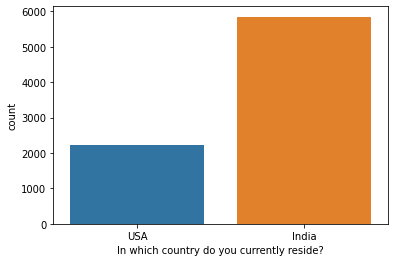

In [21]:
import seaborn as sns
sns.countplot(x = india_usa.columns[3], data = india_usa)

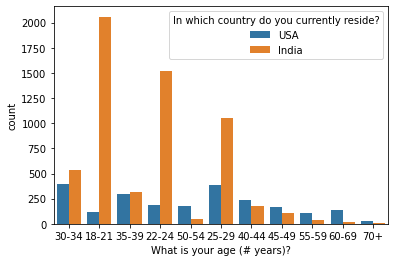

In [24]:
sns.countplot(x = india_usa.columns[1], hue = india_usa.columns[3], data = india_usa)

In [1]:
fig = px.pie(survey_df, survey_df.country_agg, 
       title="Survey Respondents between three groups - India, USA, Others", 
       hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

NameError: name 'px' is not defined

## 데이터 전처리